# Inter-Pulse-Interval

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.5)

from network import Protocol, NetworkManager, BCPNNPerfect
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity, plot_network_activity_angle
from analysis_functions import calculate_recall_time_quantities, calculate_angle_from_history, get_weights
from connectivity_functions import artificial_connectivity_matrix

In [ ]:
def simple_bcpnn_matrix(minicolumns, w_self, w_next, w_rest):

    w = np.ones((minicolumns, minicolumns)) * w_rest
    for i in range(minicolumns):
        w[i, i] = w_self

    for i in range(minicolumns -1):
        w[i + 1, i] = w_next

    return w

## An example

epochs 0
epochs 1
epochs 2
success 0.0


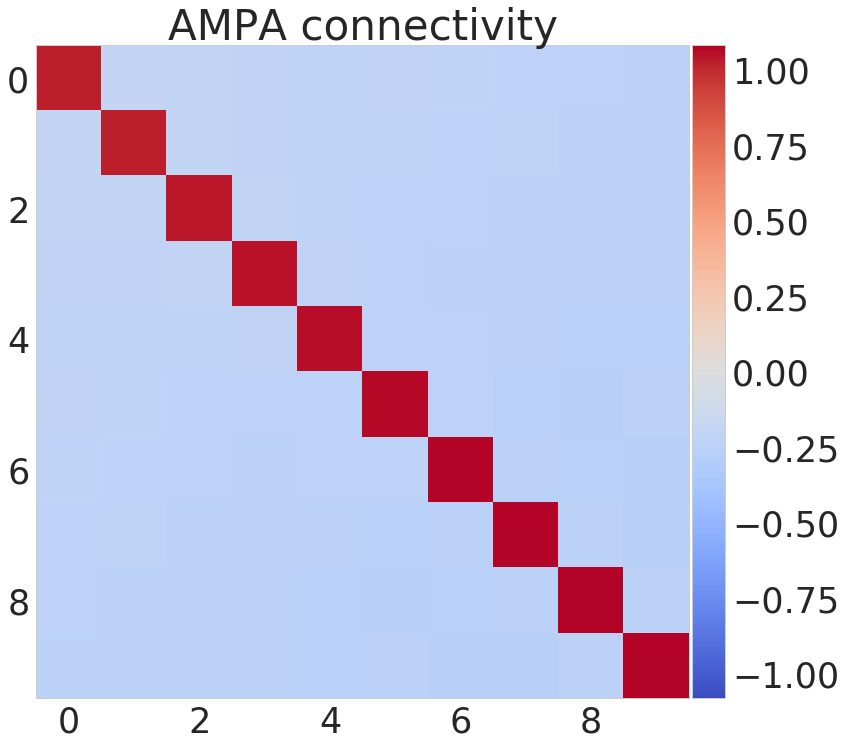

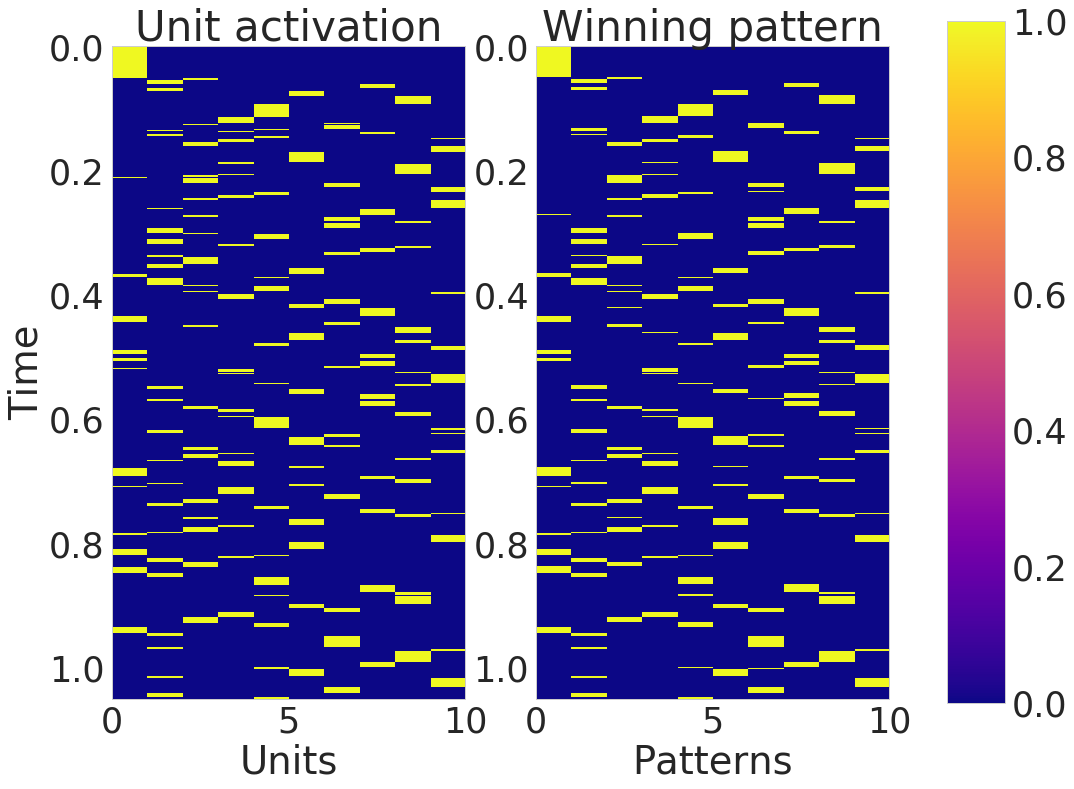

In [31]:
always_learning = True
k_perfect = True

# First we run the training protocol
g_w_ampa = 2.0
g_w = 0.0
g_a = 10.0
tau_a = 0.250
G = 1.0
sigma = 1.0
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
tau_p = 10.0

# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's']
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.100
resting_time = 0.0
epochs = 3

# Build the network
nn = BCPNNPerfect(hypercolumns, minicolumns, g_w_ampa=g_w_ampa, g_w=g_w, g_a=g_a, tau_a=tau_a, sigma=sigma, G=G,
                  tau_z_pre_ampa=tau_z_pre_ampa, tau_z_post_ampa=tau_z_post_ampa, tau_p=tau_p, z_transfer=False,
                  diagonal_zero=False, strict_maximum=False, perfect=True, k_perfect=k_perfect,
                  always_learning=always_learning)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
training_time = np.linspace(0.100, 1.0, num=n_patterns)[::-1]
# training_time = np.random.normal(loc=0.100, scale=0.010, size=n_patterns)
training_time = 0.100
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs, resting_time=resting_time)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

plot_weight_matrix(manager.nn, ampa=True)

T_recall = 1.0
T_cue = 0.050
nn.strict_maximum = True
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_network_activity_angle(manager)
print('success', success)

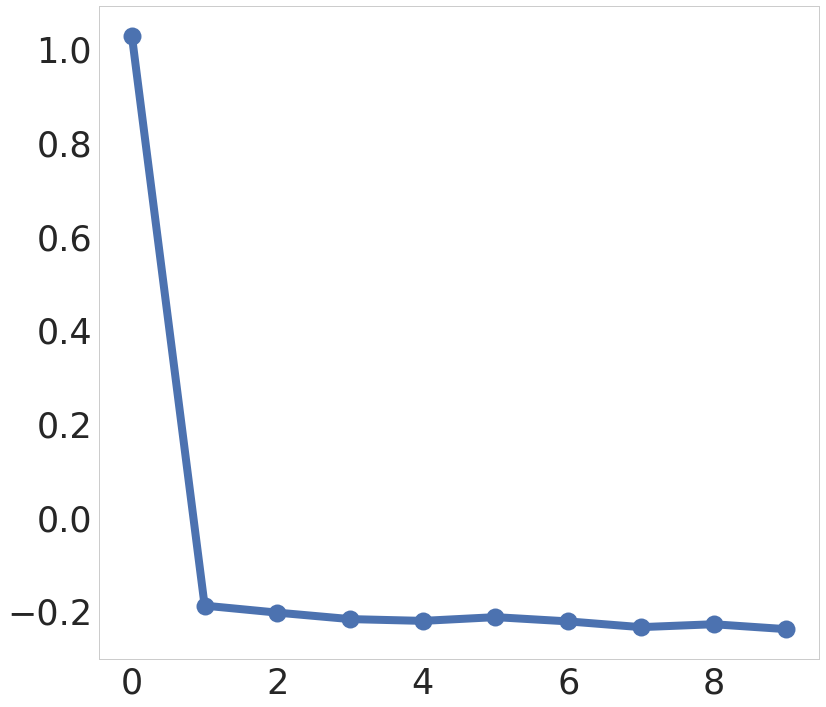

In [32]:
plt.plot(manager.nn.w_ampa[:, 0], 'o-', markersize=18, linewidth=8);